In [23]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import ast
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering,OPTICS,MeanShift,MiniBatchKMeans,Birch
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [24]:
def fill_na_with_nearest(df):
    for col in df.columns:
        # Get indices of NaNs
        nan_indices = df[df[col].isna()].index
        
        for i in nan_indices:
            # Get previous and next valid indices
            prev_idx = df[col][:i].last_valid_index()
            next_idx = df[col][i:].first_valid_index()
            
            if prev_idx is None:
                df.at[i, col] = df.at[next_idx, col]
            elif next_idx is None:
                df.at[i, col] = df.at[prev_idx, col]
            else:
                if (i - prev_idx) <= (next_idx - i):
                    df.at[i, col] = df.at[prev_idx, col]
                else:
                    df.at[i, col] = df.at[next_idx, col]
    return df

In [25]:
data = pd.read_csv('./../data/data.csv')

In [26]:
column_name = 'Nationality'

In [27]:
y=data[column_name]
x=[]

In [28]:
for index in data.index:
    real_list = ast.literal_eval(data.at[index,'error_index'])
    if data.at[index,"Gender"]=="مرد":
        real_list.extend([1])
    elif data.at[index,"Gender"]=="زن":
        real_list.extend([2])
    else:
        real_list.extend([0])
    x.append(real_list)

In [29]:
def pad_list(lst, target_length, padding_value=None):
    return lst + [padding_value] * max(0, target_length - len(lst))

In [30]:
def get_max_len(x):
    max_len=-1
    for i in x :
        if len(i)>max_len:
            max_len=len(i)
    return max_len

In [31]:
max_len=get_max_len(x)
for index in range(0,len(x)):
    x[index]=pad_list(x[index],max_len,0)

In [32]:
tsne = TSNE(n_components=2, random_state=0)
reduced_data = tsne.fit_transform(np.array(x))

In [33]:
scaler = StandardScaler()
reduced_data = scaler.fit_transform(reduced_data)

In [34]:
labels = data['Nationality']

In [35]:
reduced_df = pd.DataFrame(reduced_data, columns=['Dim1', 'Dim2'])
reduced_df['label'] = labels

In [36]:
reduced_df=fill_na_with_nearest(reduced_df)

In [59]:
algorithms = {
    'KMeans': KMeans(n_clusters=len(data['Nationality'].unique()), random_state=42),
    'Agglomerative': AgglomerativeClustering(n_clusters=len(data['Nationality'].unique())),
    'DBSCAN': DBSCAN(eps=0.05, min_samples=3),
    # 'SpectralClustering': SpectralClustering(n_clusters=len(data['Nationality'].unique()), random_state=42),      
    'Optics':OPTICS(eps=0.001, min_samples=3),
    # 'MeanShit':MeanShift(),
    'MiniBatchKmeans':MiniBatchKMeans(n_clusters=len(data['Nationality'].unique())),
    'Brich':Birch(threshold=0.01, n_clusters=len(data['Nationality'].unique())),
    "Gaussian_Mixture":GaussianMixture(n_components=len(data['Nationality'].unique()))
}

In [60]:
def evaluate_cluster_algorithm(algorithm, X,true_labels):
    labels = algorithm.fit_predict(X)

    silhouette = silhouette_score(X, labels)
    db_index = davies_bouldin_score(X, labels)
    ch_score = calinski_harabasz_score(X, labels)
    ari = adjusted_rand_score(true_labels, labels)
    nmi = normalized_mutual_info_score(true_labels, labels)
    
    return silhouette, db_index, ch_score, labels ,ari,nmi
def evaluate_cluster_algorithm_2(algorithm, X,true_labels):
    algorithm.fit(X)
    labels = algorithm.predict(X)
    
    silhouette = silhouette_score(X, labels)
    db_index = davies_bouldin_score(X, labels)
    ch_score = calinski_harabasz_score(X, labels)
    ari = adjusted_rand_score(true_labels, labels)
    nmi = normalized_mutual_info_score(true_labels, labels)
    
    return silhouette, db_index, ch_score, labels ,ari,nmi

In [61]:
results = {}
for name, algorithm in algorithms.items():
    if name in ["KMeans","Agglomerative","DBSCAN","Optics","MiniBatchKmeans"]:
        silhouette, db_index, ch_score, labels,ari,nmi = evaluate_cluster_algorithm(algorithm, reduced_data,reduced_df['label'])
    else:
        silhouette, db_index, ch_score, labels,ari,nmi = evaluate_cluster_algorithm_2(algorithm, reduced_data,reduced_df['label'])

    
    # Store results
    results[name] = {
        'Silhouette Score': silhouette,
        'Davies-Bouldin Index': db_index,
        'Calinski-Harabasz Score': ch_score,
        'Normalized Mutual Information (NMI)':nmi,
        'Adjusted Rand Index (ARI)':ari,
        'Labels': labels
    }

C:\Users\mahboub\miniforge3\lib\site-packages\sklearn\cluster\_optics.py:1081: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
C:\Users\mahboub\miniforge3\lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


KMeans:
  Silhouette Score: 0.479
  Davies-Bouldin Index: 0.683
  Calinski-Harabasz Score: 12429.668
  Normalized Mutual Information (NMI) Score: 0.122
  Adjusted Rand Index (ARI) Score: 0.005
[ 3 35 43 ... 22  9  9]


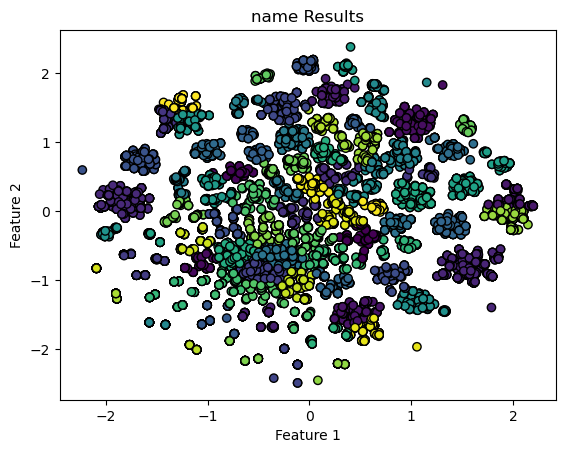


Agglomerative:
  Silhouette Score: 0.491
  Davies-Bouldin Index: 0.673
  Calinski-Harabasz Score: 12587.055
  Normalized Mutual Information (NMI) Score: 0.122
  Adjusted Rand Index (ARI) Score: 0.005
[ 8 31 65 ...  0 66 66]


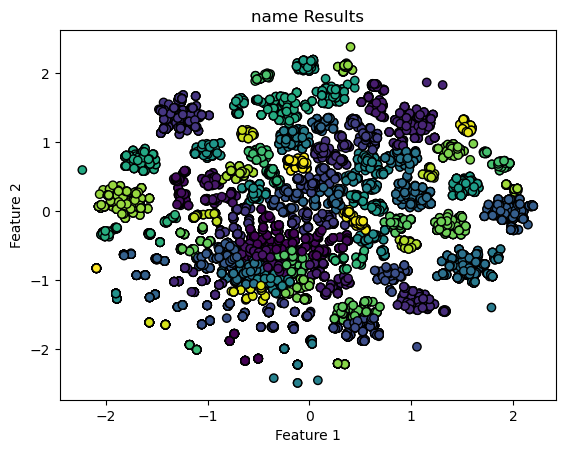


DBSCAN:
  Silhouette Score: 0.520
  Davies-Bouldin Index: 1.580
  Calinski-Harabasz Score: 1082.315
  Normalized Mutual Information (NMI) Score: 0.227
  Adjusted Rand Index (ARI) Score: 0.005
[  0   1   2 ... 220  46  70]


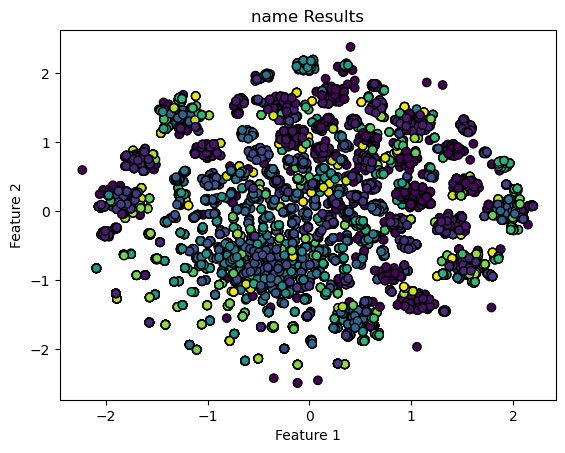


Optics:
  Silhouette Score: 0.525
  Davies-Bouldin Index: 1.433
  Calinski-Harabasz Score: 36.666
  Normalized Mutual Information (NMI) Score: 0.354
  Adjusted Rand Index (ARI) Score: -0.006
[   0   37 1000 ... 1468 1512 1472]


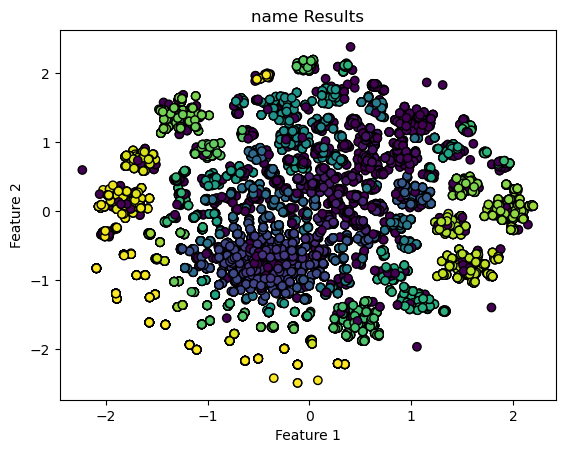


MiniBatchKmeans:
  Silhouette Score: 0.463
  Davies-Bouldin Index: 0.725
  Calinski-Harabasz Score: 12107.890
  Normalized Mutual Information (NMI) Score: 0.121
  Adjusted Rand Index (ARI) Score: 0.006
[ 9 16 46 ... 62 27 27]


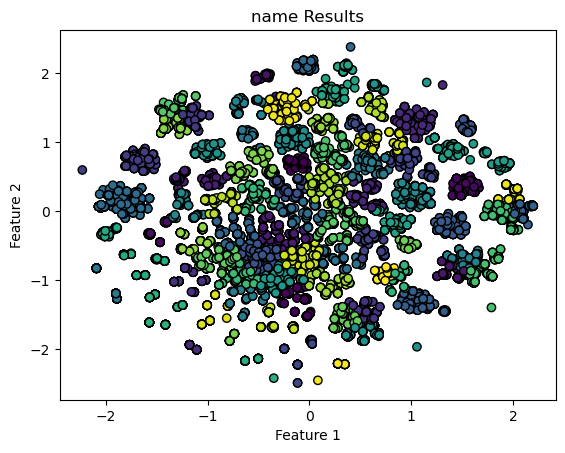


Brich:
  Silhouette Score: 0.478
  Davies-Bouldin Index: 0.675
  Calinski-Harabasz Score: 11045.257
  Normalized Mutual Information (NMI) Score: 0.122
  Adjusted Rand Index (ARI) Score: 0.004
[ 7 14 76 ... 10 12 12]


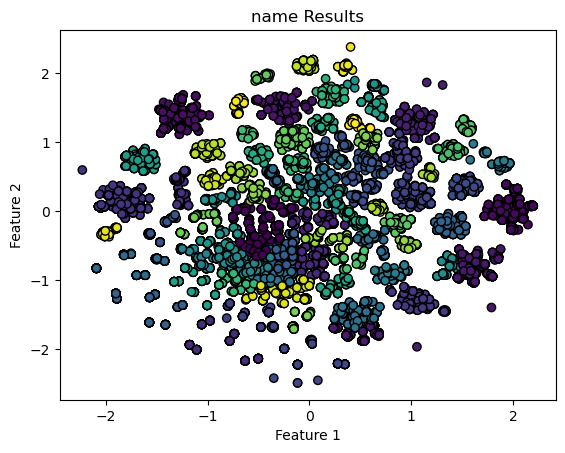


Gaussian_Mixture:
  Silhouette Score: 0.405
  Davies-Bouldin Index: 0.859
  Calinski-Harabasz Score: 8907.956
  Normalized Mutual Information (NMI) Score: 0.122
  Adjusted Rand Index (ARI) Score: 0.008
[28 25 62 ... 72 53 14]


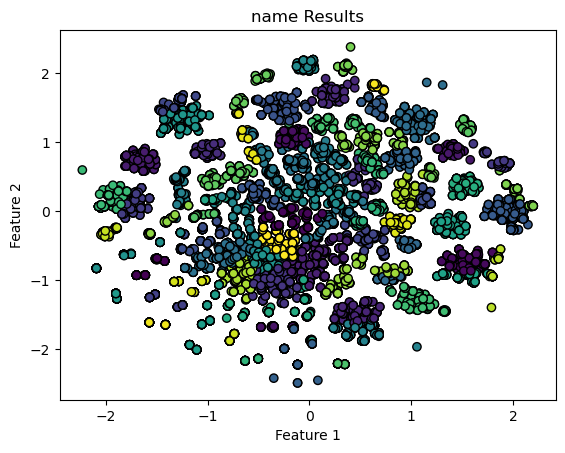

In [62]:
# Print results
for name, result in results.items():
    print(f"{name}:")
    print(f"  Silhouette Score: {result['Silhouette Score']:.3f}")
    print(f"  Davies-Bouldin Index: {result['Davies-Bouldin Index']:.3f}")
    print(f"  Calinski-Harabasz Score: {result['Calinski-Harabasz Score']:.3f}")
    print(f"  Normalized Mutual Information (NMI) Score: {result['Normalized Mutual Information (NMI)']:.3f}")
    print(f"  Adjusted Rand Index (ARI) Score: {result['Adjusted Rand Index (ARI)']:.3f}")
    print(result['Labels'])
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=result['Labels'], cmap='viridis', marker='o', edgecolor='k')
    plt.title('name Results')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
    print()



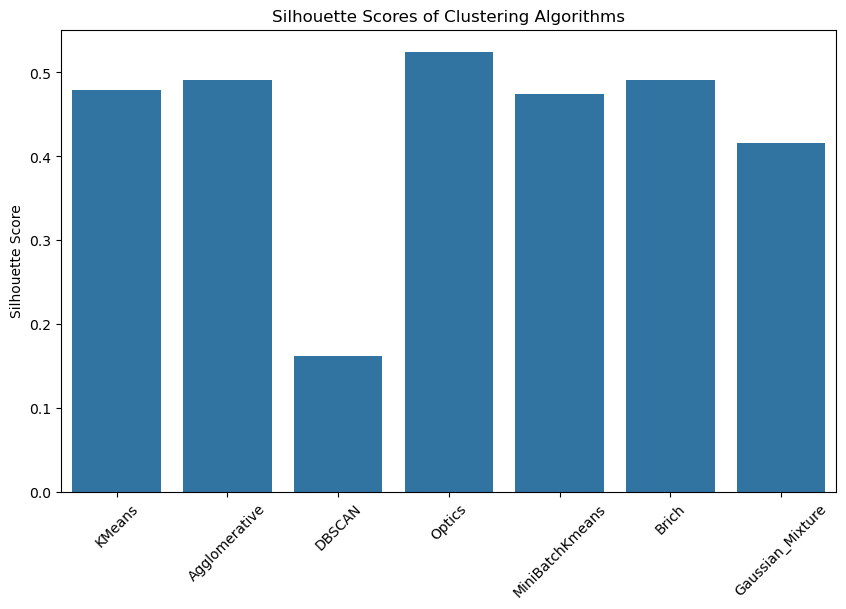

In [18]:
plt.figure(figsize=(10, 6))
scores = [results[name]['Silhouette Score'] for name in results]
sns.barplot(x=list(results.keys()),y= scores)
plt.title('Silhouette Scores of Clustering Algorithms')
plt.ylabel('Silhouette Score')
plt.xticks(rotation=45)
plt.show()

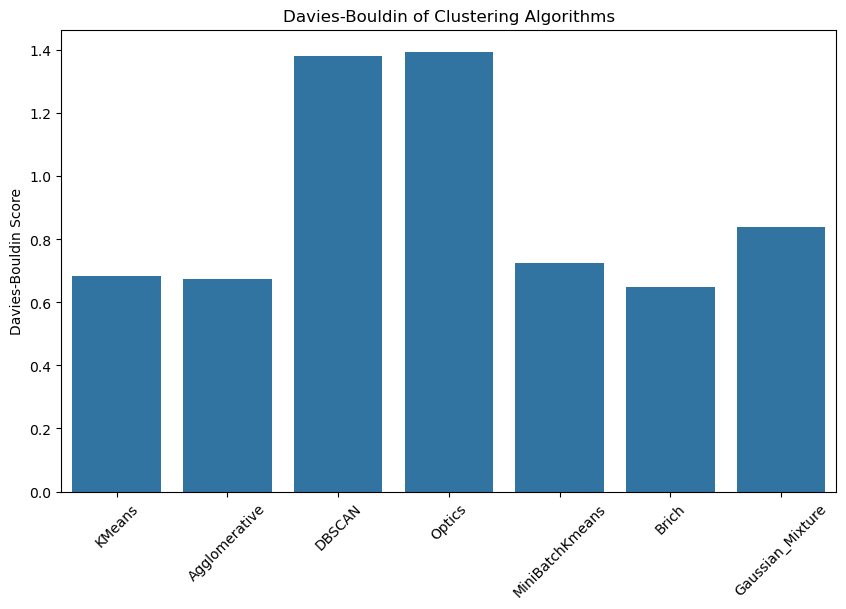

In [19]:
plt.figure(figsize=(10, 6))
scores = [results[name]['Davies-Bouldin Index'] for name in results]
sns.barplot(x=list(results.keys()),y= scores)
plt.title('Davies-Bouldin of Clustering Algorithms')
plt.ylabel('Davies-Bouldin Score')
plt.xticks(rotation=45)
plt.show()

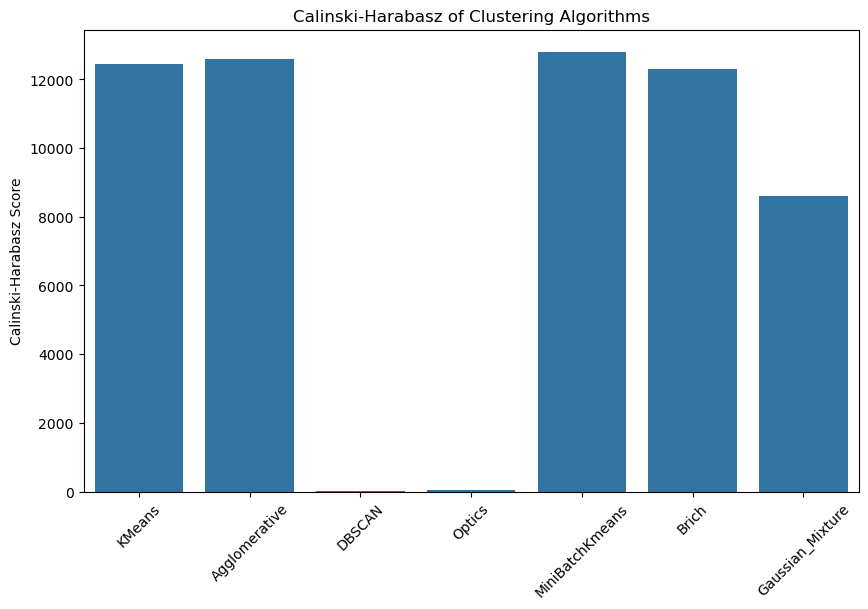

In [20]:
plt.figure(figsize=(10, 6))
scores = [results[name]['Calinski-Harabasz Score'] for name in results]
sns.barplot(x=list(results.keys()),y= scores)
plt.title('Calinski-Harabasz of Clustering Algorithms')
plt.ylabel('Calinski-Harabasz Score')
plt.xticks(rotation=45)
plt.show()

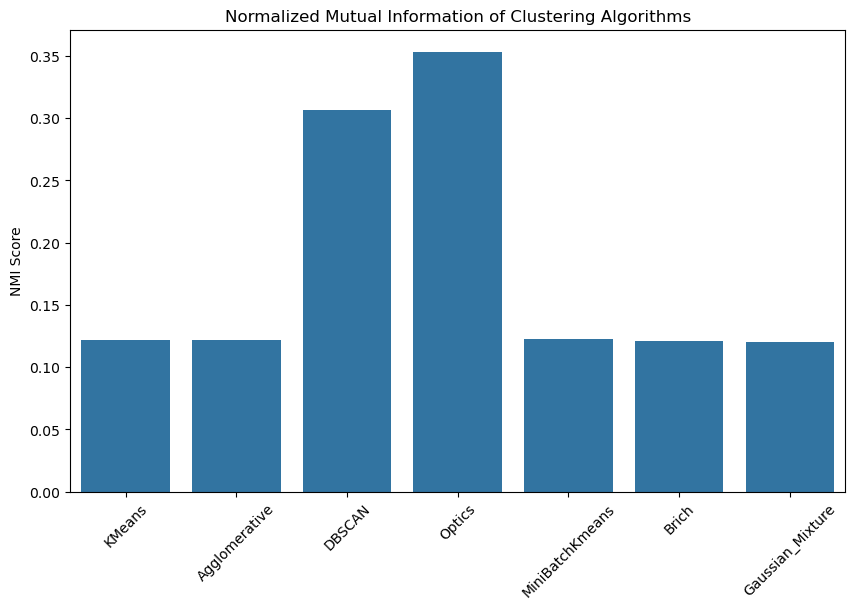

In [21]:
plt.figure(figsize=(10, 6))
scores = [results[name]['Normalized Mutual Information (NMI)'] for name in results]
sns.barplot(x=list(results.keys()),y= scores)
plt.title('Normalized Mutual Information of Clustering Algorithms')
plt.ylabel('NMI Score')
plt.xticks(rotation=45)
plt.show()

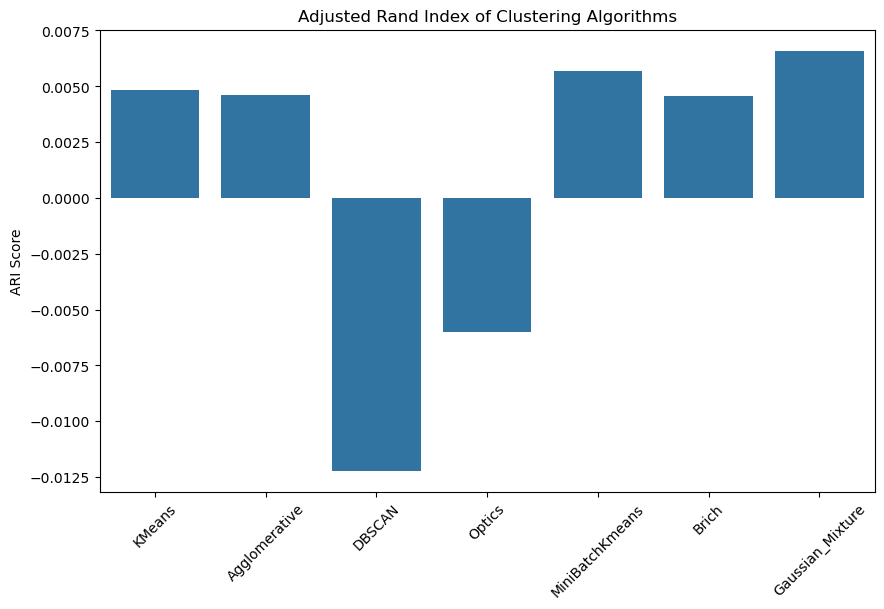

In [22]:
plt.figure(figsize=(10, 6))
scores = [results[name]['Adjusted Rand Index (ARI)'] for name in results]
sns.barplot(x=list(results.keys()),y= scores)
plt.title('Adjusted Rand Index of Clustering Algorithms')
plt.ylabel('ARI Score')
plt.xticks(rotation=45)
plt.show()